In [2]:
import pandas as pd
import networkx as nx  # https://networkx.github.io/documentation/stable/tutorial.html
import numpy as np
from collections import defaultdict # dict factory
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## PageRank-networkx

In [30]:
# 创建有向图
G = nx.DiGraph()   
# 设置有向图的边集合
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

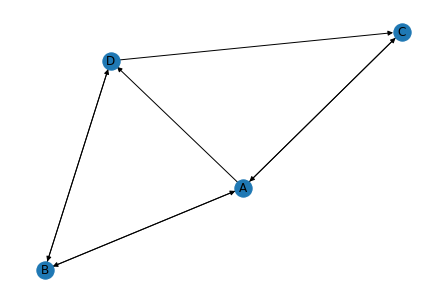

In [31]:
# 有向图可视化
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True, hold=False)
plt.show()

In [32]:
# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)
# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.8)
print("随机模型的PR值：", pr)

简化模型的PR值： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}
随机模型的PR值： {'A': 0.3214290507775999, 'B': 0.22619031640746662, 'C': 0.22619031640746662, 'D': 0.22619031640746662}


## PageRank-Email



In [3]:
emails = pd.read_csv('Emails.csv')  

In [4]:
emails.head(2)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...


In [5]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7649 non-null object
MetadataTo                      7690 non-null object
MetadataFrom                    7788 non-null object
SenderPersonId                  7788 non-null float64
MetadataDateSent                7813 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                6260 non-null object
ExtractedTo                     3288 non-null object
ExtractedFrom                   6692 non-null object
ExtractedCc                     2640 non-null object
ExtractedDateSent               6628 non-null object
ExtractedCaseNumber             7944 non-null

In [6]:
aliases = pd.read_csv('Aliases.csv')

In [7]:
aliases.head(2)

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2


In [8]:
aliases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 3 columns):
Id          850 non-null int64
Alias       850 non-null object
PersonId    850 non-null int64
dtypes: int64(2), object(1)
memory usage: 20.0+ KB


In [9]:
# 利用aliases数据集建立Alias<->PersonId之间的映射
aliases_personid = {}
for index, row in aliases.iterrows():
    aliases_personid[row['Alias']] = row['PersonId']

In [10]:
aliases_personid

{'111th congress': 1,
 'agna usemb kabul afghanistan': 2,
 'ap': 3,
 'asuncion': 4,
 'alec': 5,
 'dupuy alex': 6,
 'american beverage association': 7,
 'mayock andrew': 8,
 'shapiro andrew j': 9,
 'shapiroa@state.gov': 9,
 'slaughter annmarie': 10,
 'slaughter anne marie': 10,
 'slaughter annemarie': 10,
 'slaughtera@state.gov': 10,
 'lake anthony': 11,
 'valenzuela arturo a': 12,
 'valenzuelaaa@state.gov': 12,
 'kimoon ban': 13,
 'obama barack': 14,
 'president': 14,
 'bam@mikulski.senate.gov': 15,
 'mikulski bam': 15,
 'mikulski bam (mikulski)': 15,
 'mikulski bam (mitkulski)': 15,
 'mikulskibam (mikulski)': 15,
 'betsy.ebeling': 16,
 'ebeling betsy': 16,
 'betsyebeling': 16,
 'betsyebeling1050': 16,
 'clinton william j': 17,
 'dad': 17,
 'biography': 18,
 'klehr bonnie': 19,
 'brian': 20,
 'bstrider': 21,
 'strider burns': 21,
 'capricia marshall': 22,
 'marshall capricia': 22,
 'marshall capricia p': 22,
 'capriciamarshall': 22,
 'capriciamarshall@': 22,
 'cmarshall': 22,
 'marshal

In [11]:
persons = pd.read_csv('Persons.csv')

In [12]:
persons.head(2)

,Id,Name
0,1,111th Congress
1,2,AGNA USEMB Kabul Afghanistan


In [13]:
id_name = {}  # 建立Id-Name之间的映射关系
for index, row in persons.iterrows():
    id_name[row['Id']] = row['Name']

In [14]:
# 利用数据集Aliases和Persons进行aliases和name之间的转换
def unify_aliase(alise):
    alise = str(alise).lower()  # 小写
    alise = alise.replace(',','').split('@')[0]  # 先去掉',',再按照'@'进行切割
    if alise in aliases_personid.keys():
        return id_name[aliases_personid[alise]]
    return alise

In [15]:
# 图可视化
def show_graph(graph, layout_type='spring_layout'):
    if layout_type == 'spring_layout':  # 类似中心放射状
        positions = nx.spring_layout(graph)
    elif layout_type == 'circular_layout':  # 在一个圆环上均匀分布
        positions = nx.circular_layout(graph)
    else:
        raise NameError(layout_type, "isn't define.")
    
    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()

In [17]:
emails.MetadataFrom = emails.MetadataFrom.apply(unify_aliase)
emails.MetadataTo = emails.MetadataTo.apply(unify_aliase)

In [18]:
emails.MetadataTo

0       Hillary Clinton
1       Hillary Clinton
2                    ;h
3       Hillary Clinton
4           Huma Abedin
             ...       
7940    Hillary Clinton
7941    Hillary Clinton
7942    Hillary Clinton
7943    Hillary Clinton
7944    Hillary Clinton
Name: MetadataTo, Length: 7945, dtype: object

In [24]:
# 设置权重为发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] += 1
edges_weights_temp

defaultdict(list,
            {('Jake Sullivan', 'Hillary Clinton'): 815,
             ('nan', 'Hillary Clinton'): 20,
             ('Cheryl Mills', ';h'): 1,
             ('Cheryl Mills', 'Hillary Clinton'): 1182,
             ('Hillary Clinton', 'Huma Abedin'): 32,
             ('Hillary Clinton', 'russorv'): 26,
             ('slaughter anne-marie', 'Hillary Clinton'): 126,
             ('Harold Hongju Koh', 'Hillary Clinton'): 12,
             ('Wendy Sherman', 'Hillary Clinton'): 7,
             ('Jake Sullivan', 'Wendy Sherman'): 1,
             ('Hillary Clinton', 'sullivanjj'): 288,
             ('Sidney Blumenthal', 'Hillary Clinton'): 361,
             ('Burns Strider', 'Hillary Clinton'): 2,
             ('Huma Abedin', 'Hillary Clinton'): 1322,
             ('Cheryl Mills', 'Cheryl Mills'): 17,
             ('Robert Russo', 'Hillary Clinton'): 22,
             ('Capricia Marshall', 'Cheryl Mills'): 2,
             ('Hillary Clinton', 'Oscar Flores'): 5,
             ('Willi

In [23]:
# 转换格式 (x, y): weight - > (x, y, weight)
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]
edges_weights

[('Jake Sullivan', 'Hillary Clinton', 815),
 ('nan', 'Hillary Clinton', 20),
 ('Cheryl Mills', ';h', 1),
 ('Cheryl Mills', 'Hillary Clinton', 1182),
 ('Hillary Clinton', 'Huma Abedin', 32),
 ('Hillary Clinton', 'russorv', 26),
 ('slaughter anne-marie', 'Hillary Clinton', 126),
 ('Harold Hongju Koh', 'Hillary Clinton', 12),
 ('Wendy Sherman', 'Hillary Clinton', 7),
 ('Jake Sullivan', 'Wendy Sherman', 1),
 ('Hillary Clinton', 'sullivanjj', 288),
 ('Sidney Blumenthal', 'Hillary Clinton', 361),
 ('Burns Strider', 'Hillary Clinton', 2),
 ('Huma Abedin', 'Hillary Clinton', 1322),
 ('Cheryl Mills', 'Cheryl Mills', 17),
 ('Robert Russo', 'Hillary Clinton', 22),
 ('Capricia Marshall', 'Cheryl Mills', 2),
 ('Hillary Clinton', 'Oscar Flores', 5),
 ('William Burns', 'Hillary Clinton', 10),
 ('Monica Hanley', 'Hillary Clinton', 24),
 ('Hillary Clinton', 'abedinh', 345),
 ('Hillary Clinton', 'millscd', 298),
 ('Daniel Schwerin', 'Hillary Clinton', 9),
 ('Hillary Clinton', 'hanleymr', 33),
 ('Monica 

In [25]:
# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径以及权重
graph.add_weighted_edges_from(edges_weights)
pagerank = nx.pagerank(graph)
pagerank

{'Jake Sullivan': 0.005791704166582624,
 'Hillary Clinton': 0.30625575336382416,
 'nan': 0.13999227061446815,
 'Cheryl Mills': 0.009358382485728864,
 ';h': 0.0008967850871949974,
 'Huma Abedin': 0.010664457957706461,
 'russorv': 0.004414888802206403,
 'slaughter anne-marie': 0.001411729861610798,
 'Harold Hongju Koh': 0.0009914506387867286,
 'Wendy Sherman': 0.0011673799493548969,
 'sullivanjj': 0.040032942578700645,
 'Sidney Blumenthal': 0.007543328643239068,
 'Burns Strider': 0.0010366588039860962,
 'Robert Russo': 0.0008904426392777106,
 'Capricia Marshall': 0.0017166548334911842,
 'Oscar Flores': 0.0016529953921252999,
 'William Burns': 0.0011615538825799176,
 'Monica Hanley': 0.0008904426392777106,
 'abedinh': 0.04865794676080488,
 'millscd': 0.04143526549410853,
 'Daniel Schwerin': 0.0009243019859440611,
 'hanleymr': 0.005370314170153694,
 'Philippe Reines': 0.009023759500896596,
 'Thomas Nides': 0.0009399158462110825,
 'jilotylc': 0.03160717295021766,
 'Melanne Verveer': 0.00224

In [ ]:
# 计算每个节点的pagerank数值
pagerank_list = {node:rank for node, rank in pagerank.items()}


In [26]:
nx.set_node_attributes(graph, name='pagerank', values=pagerank)

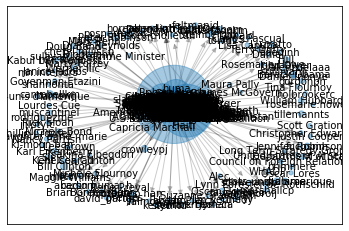

In [27]:
show_graph(graph)

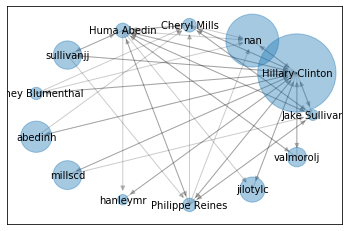

In [29]:
# 精简上图，设置PR值筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
small_graph = graph.copy()
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold:
        small_graph.remove_node(n)
show_graph(small_graph, 'circular_layout')